# **SEGUNDO PROYECTO**

En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos? 
El trabajo se organiza en tres partes:

*PARTE A - Transformación de Datos*

*PARTE B - Modelos Avanzados*

*PARTE C - Interpretación de modelos*

DESAFÍO OPCIONAL

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

In [1]:
# Cargamos las librerías que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv ("DS_Proyecto_01_Datos_Properati.csv")

In [4]:
df.describe().round()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.0,136701.0,146660.0,146660.0,140703.0,126133.0,125046.0,146660.0
mean,-35.0,-58.0,3.0,2.0,2.0,217.0,113.0,241221.0
std,0.0,0.0,1.0,1.0,1.0,2038.0,917.0,318519.0
min,-35.0,-180.0,1.0,0.0,1.0,10.0,1.0,5500.0
25%,-35.0,-59.0,2.0,1.0,1.0,52.0,47.0,111000.0
50%,-35.0,-58.0,3.0,2.0,1.0,78.0,68.0,166000.0
75%,-35.0,-58.0,4.0,3.0,2.0,140.0,108.0,265000.0
max,85.0,-58.0,35.0,15.0,14.0,193549.0,126062.0,32434232.0


In [5]:
df = df [(df.l2 == 'Capital Federal')]
df.drop(['created_on','start_date','end_date','lat','lon','title','description','operation_type',
            'currency','l1'], axis='columns', inplace=True) 

In [6]:
df = df [(df.surface_total >= df.surface_covered)]

In [7]:
machine_learning = df.copy()

In [8]:
# Filtramos por los datos con los que trabajamos en nuestro primer proyecto
df = df [(df.property_type == 'Departamento')|(df.property_type == 'Casa')|(df.property_type == 'PH')]
df = df [(df.surface_total >= 15)] 
df = df [(df.surface_total <= 1000)]
df = df [(df.price <= 4000000)]
df = df [(df.l2 == 'Capital Federal')]

In [9]:
#Se eliminan las filas que pueden estar duplicadas
df.drop_duplicates(inplace=True)

In [10]:
df.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH


In [11]:
df.shape

(47868, 9)

## **PARTE A** ##

**PARTE A - Transformación de Datos : debes implementar al menos tres de las transformaciones de datos propuestas.**

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa:

<span style="color:red">Detección y eliminación de Outliers</span> 

<span style="color:red">Imputación de valores faltantes</span> 

<span style="color:red">Encoding</span> 

<span style="color:red">Escalado de datos</span>

Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Debes justificar por qué creés que las transformaciones elegidas aplican en este dataset. Ten en cuenta que, en el manejo de valores atípicos o en la imputación de valores faltantes, los valores obtenidos deben tener sentido. Por ejemplo, valores mayores que cero para superficies, número de baños, etc.

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

### *Tarea 1 : DETECCIÓN Y ELIMINACIÓN DE OUTLIERS* ###

*En nuestro dataset pueden existir algunas instancias con valores muy por encima o muy por debajo del resto. Cuando queremos hacer un histograma, estos valores pueden distorsionar nuestra escala, dificultando su visualización. Además, muchos modelos tienen desempeño subóptimo cuando las variables de entrada no siguen una distribución cercana a una normal, por lo que los valores atípicos pueden degradar el desempeño de nuestro modelo. Por ello, lo primero que vamos a realizar es la detección y la eliminación de los outliers.*

**Detección y eliminación de outliers**

In [270]:
# Se realiza en un solo paso este cálculo
# para todas las variables en el data frame

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

rooms                   2.0
bedrooms                2.0
bathrooms               1.0
surface_total          65.0
surface_covered        53.0
price              166000.0
dtype: float64


In [271]:
# Cantidad de outliers por variable
outliers_df = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
outliers_df.sum()

bathrooms          1723
bedrooms            118
l2                    0
l3                    0
price              4157
property_type         0
rooms               361
surface_covered    3454
surface_total      3438
dtype: int64

In [272]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
cut_off = iqr*1.5  
df_filtred = df[~((df < (df.quantile(0.25) - cut_off)) | (df > (df.quantile(0.75) + cut_off))).any(axis=1)]

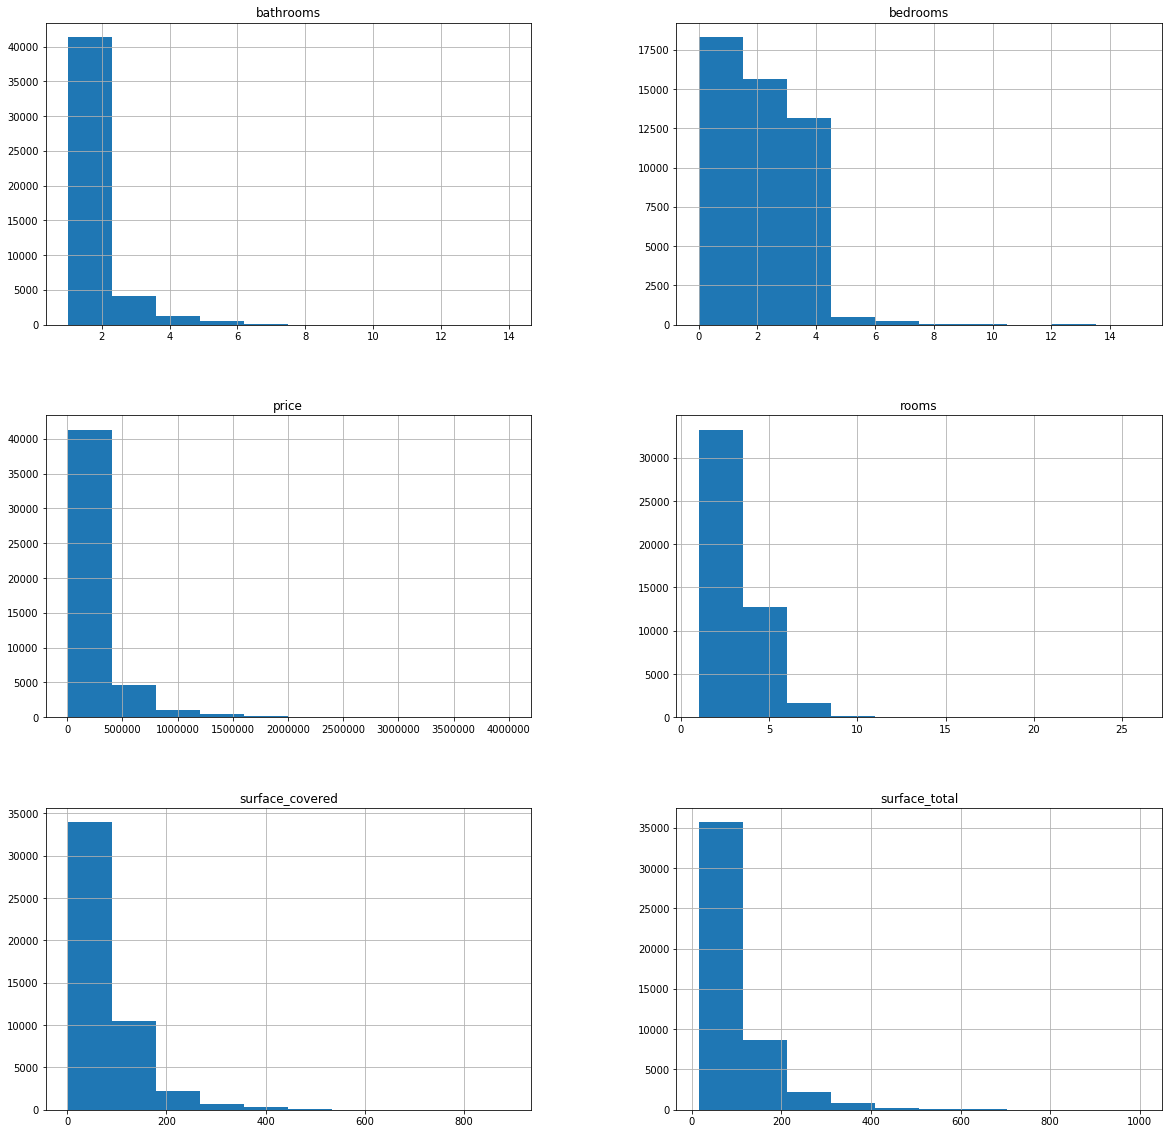

In [273]:
# Histograma con df original
df_original = df.hist(figsize = (20,20))

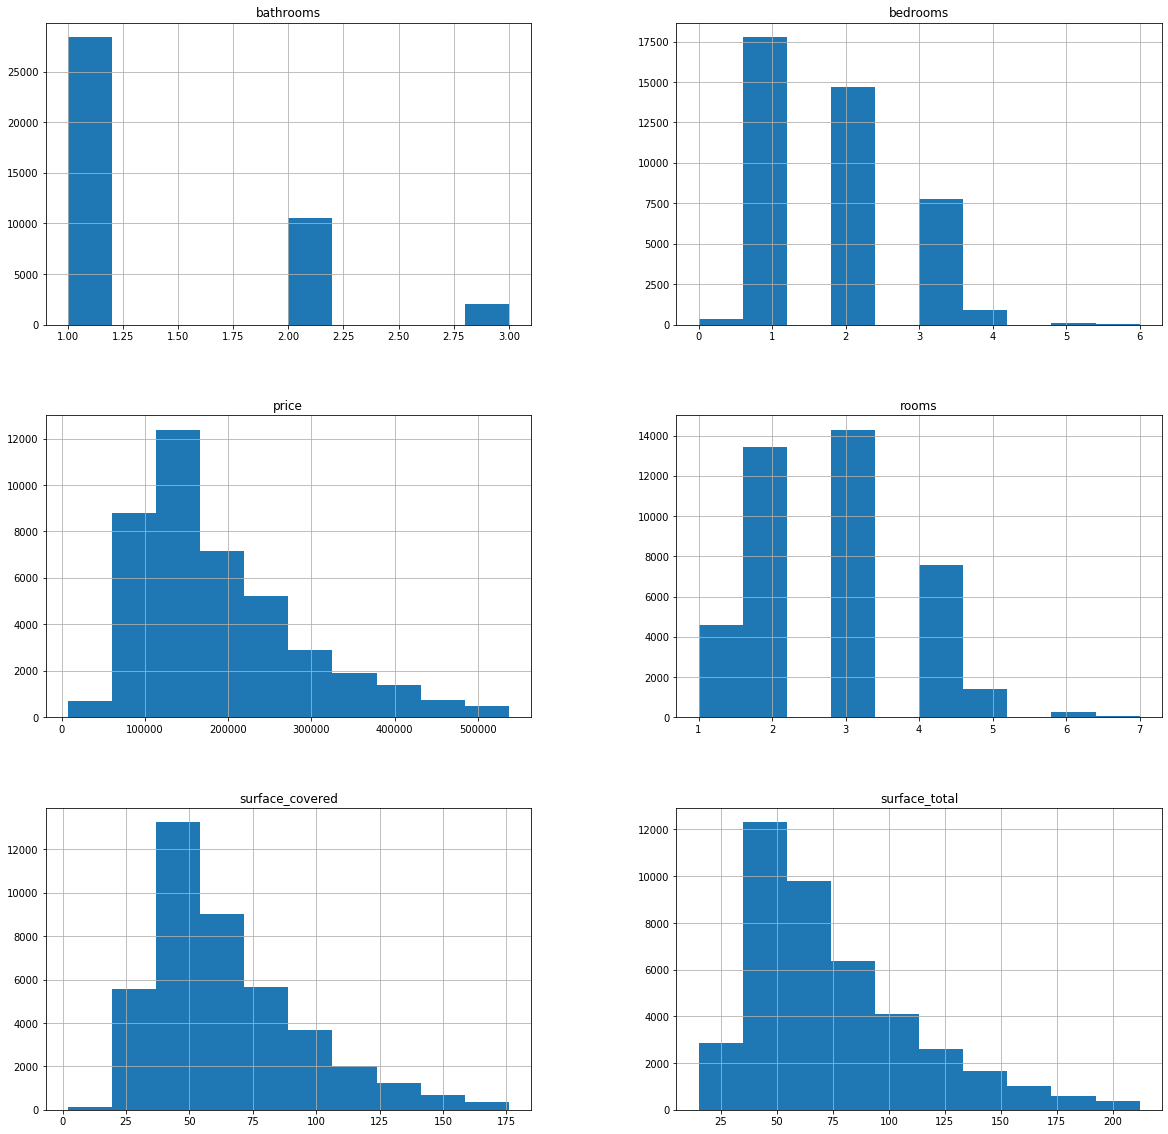

In [274]:
# Histograma con filtrado de outliers
df_filtred_outliers = df_filtred.hist(figsize = (20,20))

Vemos como mejora nuestro histograma una vez que hemos filtrado los outliers.

### *Tarea 2 : IMPUTACION VALORES FALTANTES* ###

Una situación a la que se enfrenta frecuentemente cualquier científico de datos es el tratamiento de los valores faltantes.  Existen multitud de procedimientos para aplicar cuando tenemos valores perdidos. Aunque básicamente existen dos aproximaciones posibles:

1. Eliminar muestras o variables que tienen datos faltantes.
2. Imputar los valores perdidos, es decir, sustituirlos por estimaciones.

In [275]:
df_filtred.isnull().sum()

l2                   0
l3                   0
rooms                0
bedrooms             0
bathrooms          624
surface_total        0
surface_covered      0
price                0
property_type        0
dtype: int64

In [276]:
valores_medios_bano = df_filtred .groupby('property_type')['bathrooms'].mean()
valores_medios_bano = dict(round(valores_medios_bano))
df_filtred.bathrooms = df_filtred.bathrooms.fillna(df_filtred.property_type.map(valores_medios_bano))

In [277]:
df_filtred.isnull().sum()

l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

*Para determinar los valores faltantes se decidió utilizar la variable estadística media. Como la media nos da un valor float para el número de baños por departamento, casa y PH, que no es aplicable en este caso (ej. media de baños = 1,59; no podemos tener un baño y medio), se utiliza la función round para redondear el valor.*

### *Tarea 3 : ENCODING* ###

Existe mucha información en los atributos categóricos, por ello la importancia de poder transformarlos a categorías numéricas para poderlos incorporar a los modelos de una forma eficiente. En este caso se utiliza la función get_dummies de pandas para transformar nuestras variables categóricas en variables numéricas.

In [278]:
df_filtred.columns

Index(['l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'property_type'],
      dtype='object')

In [279]:
df_filtred = pd.get_dummies (df_filtred,columns=['property_type','l2','l3'])

In [280]:
df_filtred.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH,l2_Capital Federal,...,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


### *Tarea 4 : ESCALADO DE DATOS* ###

El escalado va a transformar los valores de las características de forma que estén confinados en un rango, típicamente [0, 1] o [-1, 1]. Es importante recordar que el escalador deberá entrenarse solo con los datos de entrenamiento para evitar fugas, y que deberá aplicarse de igual forma tanto a los datos de entrenamiento como a los de validación y prueba.

In [281]:
from sklearn.preprocessing import StandardScaler

X = df_filtred.loc [:,df_filtred.columns]
y = df_filtred ['price']

In [282]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [283]:
sc = StandardScaler ().fit (X_train)
X_train_std = sc.transform (X_train)
X_test_std = sc.transform (X_test)

In [284]:
df_X = pd.DataFrame(X_train_std)
df_y = pd.DataFrame(y_train).reset_index()

In [285]:
df_final = pd.concat ([df_X,df_y],axis=1)

In [286]:
df_final.shape

(31212, 69)

In [287]:
df_final.drop(['price','index'], axis='columns', inplace=True) 

In [288]:
df_final.columns = [X_train.columns]

In [289]:
df_final.tail()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH,l2_Capital Federal,...,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
31207,1.207142,1.409171,1.133740,1.358082,0.336644,-0.097503,-0.126553,-2.541623,2.730193,0.0,...,-0.088028,-0.095485,-0.064672,-0.104318,-0.046727,-0.02468,-0.070186,-0.031018,-0.223584,6.989952
31208,0.253407,0.236102,-0.616324,-0.697808,-1.005819,-1.208606,-0.126553,-2.541623,2.730193,0.0,...,-0.088028,-0.095485,-0.064672,-0.104318,-0.046727,-0.02468,-0.070186,-0.031018,-0.223584,-0.143063
31209,-1.654064,-0.936967,-0.616324,-0.860116,-0.737327,-0.464473,-0.126553,0.393449,-0.366274,0.0,...,-0.088028,-0.095485,-0.064672,-0.104318,-0.046727,-0.02468,-0.070186,-0.031018,-0.223584,-0.143063
31210,1.207142,1.409171,1.133740,0.735905,0.940752,0.106369,-0.126553,0.393449,-0.366274,0.0,...,-0.088028,-0.095485,-0.064672,-0.104318,-0.046727,-0.02468,-0.070186,-0.031018,-0.223584,-0.143063
31211,1.207142,1.409171,1.133740,2.304874,2.853762,2.552833,-0.126553,0.393449,-0.366274,0.0,...,-0.088028,-0.095485,-0.064672,-0.104318,-0.046727,-0.02468,-0.070186,-0.031018,-0.223584,-0.143063


### *Tarea 4 : Entrenamiento árbol de decisión* ###

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

In [290]:
machine_learning = df_filtred.copy()

In [291]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("Tamaño de Base:", machine_learning.shape)
print("Tamaño de Muestra de Entrenamiento:", X_train.shape)
print("Tamaño de Muestra de Testeo", X_test.shape)
print("Tamaño del Target de Entrenamiento:", y_train.shape)
print("Tamaño del Target de Testeo", y_test.shape)

Tamaño de Base: (41616, 67)
Tamaño de Muestra de Entrenamiento: (29131, 67)
Tamaño de Muestra de Testeo (12485, 67)
Tamaño del Target de Entrenamiento: (29131,)
Tamaño del Target de Testeo (12485,)


In [292]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)

In [293]:
tree_regressor = DecisionTreeRegressor(max_depth = 3)

In [294]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [295]:
y_pred = tree_regressor.predict(X_test)

In [296]:
print('Score R2:')
print(tree_regressor.score(X_train, y_train))

Score R2:
0.9767515197021583


A continuación se evalúa el modelo obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.

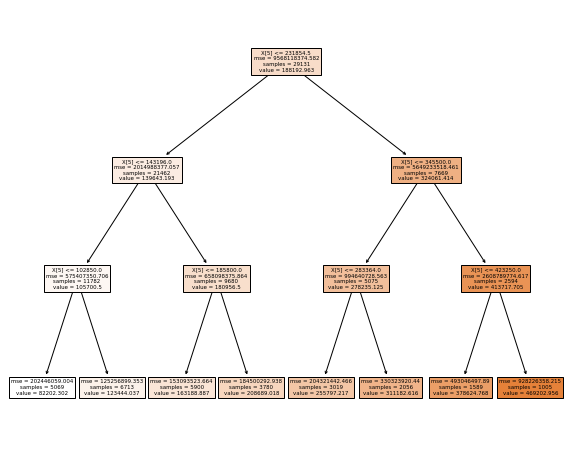

In [297]:
from sklearn import tree
if tree_regressor.max_depth < 4:
    plt.figure(figsize = (10,8))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

In [298]:
# Definimos las listas vacias para los valores de R2 deseados
r2_score_arbol = []

# Definimos la profunidad del arbol que vamos a explorar
max_depth = [1,2,3,4,5,6,7,8,9,10]

# Generamos en loop sobre los distintos valores de arbol
for i in max_depth:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    tree_regressor = DecisionTreeRegressor(max_depth = i)
    # Entrenar el modelo
    tree_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_pred = tree_regressor.predict(X_test)
    
    # Predecir y evaluar sobre el set de evaluación
    score_arbol = tree_regressor.score(X_train, y_train)
    
    # Agregar la información a las listas
    r2_score_arbol.append(score_arbol)

Text(0.5, 1.0, 'Relación entre la profundidad del árbol y su R2')

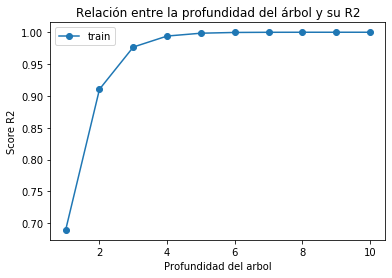

In [299]:
plt.plot(max_depth,r2_score_arbol,'o-',label='train' )
plt.legend()
plt.xlabel('Profundidad del arbol')
plt.ylabel('Score R2')
plt.title('Relación entre la profundidad del árbol y su R2')

<img src="1.png">

**Podemos observar que no existen diferencias significativas en la relación entre el Score de R2 y la profundidad del árbol al comparar ambos modelos.**

Raíz del error cuadrático medio en Train: 48.29198926116998
Raíz del error cuadrático medio en Test: 96.60999904660305


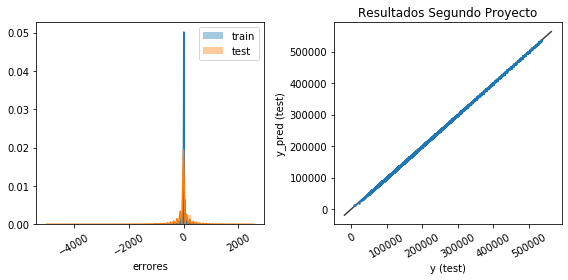

In [300]:
from sklearn.metrics import mean_squared_error
import seaborn as sns

y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.xticks (rotation=30)
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.xticks (rotation=30)
plt.ylabel('y_pred (test)')
plt.title ('Resultados Segundo Proyecto')   
plt.tight_layout()
plt.show()

<img src="2.png">

**Evidentemente tenemos una mejora en nuestro modelo de árbol de regresión. A través de un eficiente pre procesamiento de datos, nos permite clasificar nuestros datos con una menor margen de error, determinado por el valor de RSME.**



## Parte B ##

**PARTE B - Modelos Avanzados : al menos un modelo debe ser optimizado por Grid Search o Random Search; el otro puede ser optimizado por búsqueda manual (es decir, puedes dejar los mejores parámetros que encontraste probando)**

Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

In [301]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve

In [302]:
data = df_final.copy()

In [303]:
data.columns

MultiIndex([(                     'rooms',),
            (                  'bedrooms',),
            (                 'bathrooms',),
            (             'surface_total',),
            (           'surface_covered',),
            (                     'price',),
            (        'property_type_Casa',),
            ('property_type_Departamento',),
            (          'property_type_PH',),
            (        'l2_Capital Federal',),
            (                 'l3_Abasto',),
            (              'l3_Agronomía',),
            (                'l3_Almagro',),
            (              'l3_Balvanera',),
            (               'l3_Barracas',),
            (           'l3_Barrio Norte',),
            (               'l3_Belgrano',),
            (                   'l3_Boca',),
            (                  'l3_Boedo',),
            (              'l3_Caballito',),
            (              'l3_Catalinas',),
            (   'l3_Centro / Microcentro',),
          

In [304]:
columnas_descartables = [(        'l2_Capital Federal',),
            (                 'l3_Abasto',),
            (              'l3_Agronomía',),
            (                'l3_Almagro',),
            (              'l3_Balvanera',),
            (               'l3_Barracas',),
            (           'l3_Barrio Norte',),
            (               'l3_Belgrano',),
            (                   'l3_Boca',),
            (                  'l3_Boedo',),
            (              'l3_Caballito',),
            (              'l3_Catalinas',),
            (   'l3_Centro / Microcentro',),
            (              'l3_Chacarita',),
            (                'l3_Coghlan',),
            (             'l3_Colegiales',),
            (               'l3_Congreso',),
            (           'l3_Constitución',),
            (                 'l3_Flores',),
            (               'l3_Floresta',),
            (            'l3_Las Cañitas',),
            (                'l3_Liniers',),
            (              'l3_Mataderos',),
            (              'l3_Monserrat',),
            (           'l3_Monte Castro',),
            (                  'l3_Nuñez',),
            (                   'l3_Once',),
            (                'l3_Palermo',),
            (      'l3_Parque Avellaneda',),
            (      'l3_Parque Centenario',),
            (       'l3_Parque Chacabuco',),
            (            'l3_Parque Chas',),
            (       'l3_Parque Patricios',),
            (               'l3_Paternal',),
            (                'l3_Pompeya',),
            (          'l3_Puerto Madero',),
            (               'l3_Recoleta',),
            (                 'l3_Retiro',),
            (               'l3_Saavedra',),
            (          'l3_San Cristobal',),
            (            'l3_San Nicolás',),
            (              'l3_San Telmo',),
            (             'l3_Tribunales',),
            (        'l3_Velez Sarsfield',),
            (              'l3_Versalles',),
            (           'l3_Villa Crespo',),
            (           'l3_Villa Devoto',),
            (    'l3_Villa General Mitre',),
            (           'l3_Villa Lugano',),
            (             'l3_Villa Luro',),
            (          'l3_Villa Ortuzar',),
            (       'l3_Villa Pueyrredón',),
            (             'l3_Villa Real',),
            (        'l3_Villa Riachuelo',),
            (       'l3_Villa Santa Rita',),
            (          'l3_Villa Soldati',),
            (          'l3_Villa Urquiza',),
            (       'l3_Villa del Parque',)]
data = data.drop (columns=columnas_descartables)
data.shape

(31212, 9)

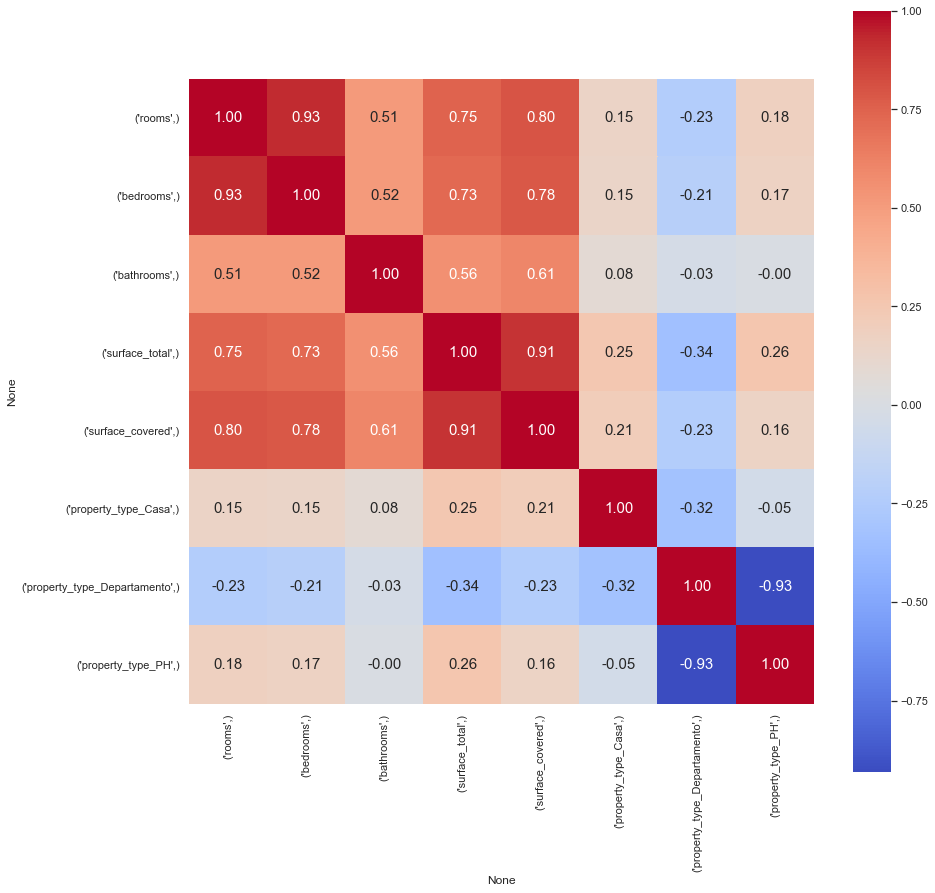

In [305]:
corr = data.drop(columns = ['price']).corr(method='pearson') # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
            xticklabels= data.drop(columns = ['price']).columns,
            yticklabels= data.drop(columns = ['price']).columns,
            cmap= 'coolwarm')

plt.show()

In [306]:
data.columns

MultiIndex([(                     'rooms',),
            (                  'bedrooms',),
            (                 'bathrooms',),
            (             'surface_total',),
            (           'surface_covered',),
            (                     'price',),
            (        'property_type_Casa',),
            ('property_type_Departamento',),
            (          'property_type_PH',)],
           )

In [307]:
data.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
0,0.253407,0.236102,1.133740,0.357188,0.470890,0.269467,-0.126553,0.393449,-0.366274
1,-0.700329,-0.936967,-0.616324,-0.237938,-0.502396,-0.607183,-0.126553,-2.541623,2.730193
2,0.253407,0.236102,-0.616324,-0.968320,-0.871573,-0.821249,-0.126553,0.393449,-0.366274
3,-0.700329,-0.936967,-0.616324,-0.237938,-0.569519,-0.749894,-0.126553,0.393449,-0.366274
4,0.253407,0.236102,1.133740,0.546546,0.538013,0.514113,-0.126553,0.393449,-0.366274


## 1er Modelo : AdaBoost ##

AdaBoost funciona eligiendo un algoritmo base y mejorándolo iterativamente al tomar en cuenta los casos incorrectamente clasificados en el conjunto de entrenamiento. Lo elegí como modelo inicial ya que me pareció de aplicación sencilla y el que comprendí mas fácilmente para ejecutarlo.

In [308]:
# Elegimos sobre que coolumnas queremos trabajar

X = data.iloc[:, 3].values # Utilizamos nuestra variable "bathrooms" que fue la de mayor correlación en 
                           # primer proyecto.
print(X) 
y = data.iloc[:, 5].values # Target variable "price"
print (y)

[ 0.35718809 -0.23793819 -0.96832045 ... -0.86011567  0.73590482
  2.30487411]
[ 0.26946665 -0.60718308 -0.82124872 ... -0.46447266  0.10636903
  2.55283341]


In [309]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [310]:
ada_rgs = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=100)
# Entrenamos el modelo
ada_rgs.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=5,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [311]:
from sklearn.metrics import r2_score,mean_squared_error
y_train_pred = ada_rgs.predict(X_train)
y_test_pred = ada_rgs.predict(X_test)
print(metrics.r2_score(y_train, y_train_pred))
print(metrics.r2_score(y_test, y_test_pred))

0.9999527644767274
0.9999528610123124


Text(0.5, 0, 'Número de árbol')

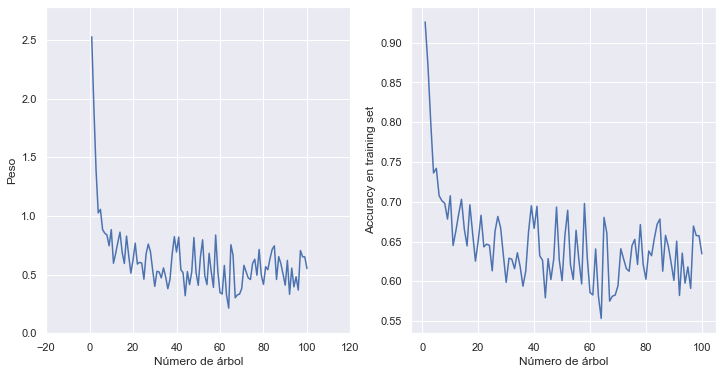

In [312]:
# Tomamos entonces la cantidad de arboles que realmente tiene el ensamble
numero_arboles = len(ada_rgs)

# En la variable estimator_weights_ esta el peso de cada arbol
pesos = ada_rgs.estimator_weights_[:numero_arboles]

# Calculamos el accuracy DE CADA ARBOL en el ensamble. En estimator_errors_ esta el error que comete cada uno.
errores_arboles = ada_rgs.estimator_errors_[:numero_arboles]
accuracy_arboles = 1-errores_arboles

# Graficamos
plt.figure(figsize = (12,6))
plt.subplot(121)
# En el eje 'x' ponemos el índice (número) de cada arbol, en el 'y' los pesos
plt.plot(range(1, numero_arboles + 1), pesos)
plt.ylabel('Peso')
plt.xlabel('Número de árbol')
plt.ylim((0, pesos.max() * 1.1))
plt.xlim((-20, numero_arboles + 20))
plt.subplot(122)
# En el eje 'x' ponemos el índice (número) de cada arbol, en el 'y' el accuracy de cada arbol
plt.plot(range(1, numero_arboles + 1), accuracy_arboles)
plt.ylabel('Accuracy en training set')
plt.xlabel('Número de árbol')

Text(0.5, 0, 'Número de árboles')

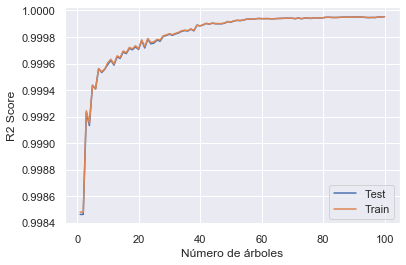

In [313]:
accuracy_test = []
accuracy_train = []
# Calculamos el r2 sobre el test set
for prediccion_test in ada_rgs.staged_predict(X_test):
    accuracy_test.append(metrics.r2_score(prediccion_test,y_test))
    
for prediccion_train in ada_rgs.staged_predict(X_train):    
    accuracy_train.append(metrics.r2_score(prediccion_train,y_train))
    
plt.plot(range(1, len(accuracy_test) + 1), accuracy_test, label = 'Test')
plt.plot(range(1, len(accuracy_test) + 1), accuracy_train, label = 'Train')
plt.legend()
plt.ylabel('R2 Score')
plt.xlabel('Número de árboles')

In [314]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

ada_rgs_inst = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

ada_rgs_inst.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=None),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [315]:
ada_rgs_inst.best_params_

{'n_estimators': 50, 'loss': 'square', 'learning_rate': 1}

In [316]:
# Optimizamos los hiperparámetros
ada_rgs_op = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=50,loss='exponential', learning_rate= 0.3)

In [317]:
# Entrenamiento del modelo
ada_rgs_op.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=5,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [318]:
# Evaluación del modelo
from sklearn.metrics import r2_score,mean_squared_error
y_train_pred = ada_rgs_op.predict(X_train)
y_test_pred = ada_rgs_op.predict(X_test)
print(metrics.r2_score(y_train, y_train_pred))
print(metrics.r2_score(y_test, y_test_pred))

0.9998245566305677
0.9998231954878881


## 2do Modelo : Random Forest ##

Elegi este como segundo modelo ya que puede resolver ambos tipos de problemas, es decir, clasificación y regresión, y realiza una estimación decente en ambos frentes, si bien hace un buen trabajo en la clasificación, pero no es tanto bueno como para los problemas de regresión, ya que no proporciona predicciones precisas y continuas sobre la naturaleza. Me incliné por este modelo, ya que quería ver los resultados con bagging, ya que en mi modelo anterior utlice boosting y quería comparar los resultados y practicar sobre ambos modelos. 

In [319]:
# Importamos la librerías necesarias

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

In [320]:
X = data.iloc[:,[1,2,3,4]].values # Utilizamos nuestra variable "bathrooms" que fue la de mayor correlación en 
                           # primer proyecto.
print(X) 
y = data.iloc[:, 5].values # Target variable "price"
print (y)

[[ 0.23610218  1.13374034  0.35718809  0.47089003]
 [-0.93696712 -0.61632412 -0.23793819 -0.50239567]
 [ 0.23610218 -0.61632412 -0.96832045 -0.871573  ]
 ...
 [-0.93696712 -0.61632412 -0.86011567 -0.7373267 ]
 [ 1.40917149  1.13374034  0.73590482  0.94075209]
 [ 1.40917149  1.13374034  2.30487411  2.8537619 ]]
[ 0.26946665 -0.60718308 -0.82124872 ... -0.46447266  0.10636903
  2.55283341]


In [321]:
X = pd.DataFrame (X)

In [322]:
# Realizamos el train - test de los datos

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [323]:
rgs = RandomForestRegressor(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
rgs.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [324]:
y_train_pred = rgs.predict(X_train)
y_test_pred = rgs.predict(X_test)
print(metrics.mean_squared_error(y_train, y_train_pred))
print(metrics.mean_squared_error(y_test, y_test_pred))

0.17444660947360788
0.3726151074773132


In [325]:
rgs.oob_score_

0.6339779668632265

In [326]:
# Las variables mas importantes son "bathromms" y "surface_total"
rgs.feature_importances_

array([0.03605132, 0.14063224, 0.39089154, 0.4324249 ])

In [327]:
rgs.estimators_

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1608637542, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1273642419, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impur

In [328]:
rgs_tree = rgs.estimators_[20]
rgs_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 88409749,
 'splitter': 'best'}

In [329]:
y_train_pred = rgs_tree.predict(X_train)
y_test_pred = rgs_tree.predict(X_test)
print(metrics.mean_squared_error(y_train, y_train_pred))
print(metrics.mean_squared_error(y_test, y_test_pred))

0.278225574340877
0.4954236273651518


In [330]:
train_accuracy = []
test_accuracy = []
oob_scores = []

N_estimadores = [1,2,3,4,5,10,25,50,100,250,500,1000]
for estimadores in N_estimadores:
    print(estimadores)
    rgs = RandomForestRegressor(n_estimators=estimadores, n_jobs=-1, oob_score= True, random_state = 42)
    rgs.fit(X_train,y_train)
    
    y_train_pred = rgs.predict(X_train)
    y_test_pred = rgs.predict(X_test)
    
    train_accuracy.append(metrics.mean_squared_error(y_train, y_train_pred))
    test_accuracy.append(metrics.mean_squared_error(y_test, y_test_pred))
    oob_scores.append(rgs.oob_score_)
    
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)
oob_scores = np.array(oob_scores)

1
2
3
4
5
10
25
50
100
250
500
1000


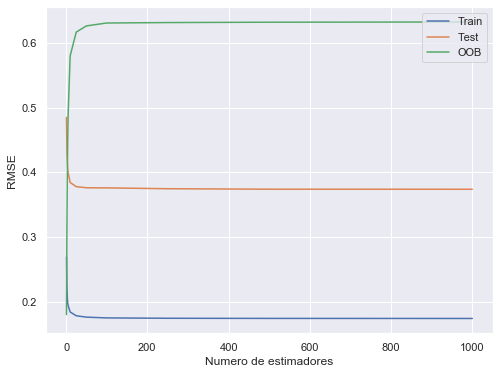

In [331]:
plt.figure(figsize = (8,6))
plt.plot(N_estimadores, train_accuracy, label = 'Train')
plt.plot(N_estimadores, test_accuracy, label = 'Test')
plt.plot(N_estimadores, oob_scores, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('RMSE')
plt.legend()
# plt.xlim(0,50)
plt.show()

In [332]:
rgs = RandomForestRegressor(n_estimators=250, n_jobs=-1, oob_score= True, random_state = 42)

train_sizes, train_scores, valid_scores = learning_curve(rgs, X_train, y_train, 
                                                         train_sizes = np.linspace(0.0001,1,10),
                                                         scoring ='neg_mean_absolute_error',cv=5)

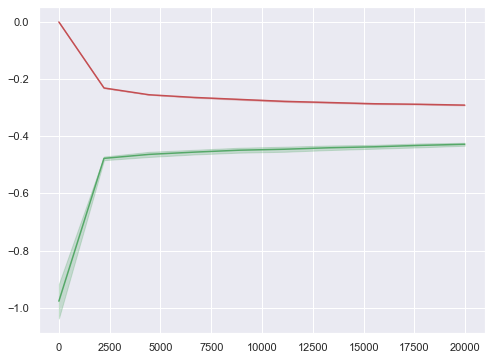

In [333]:
plt.figure(figsize = (8,6))
plt.plot(train_sizes, train_scores.mean(axis = 1), color = 'r')
plt.plot(train_sizes, valid_scores.mean(axis = 1), color = 'g')

plt.fill_between(train_sizes, train_scores.mean(axis = 1)- train_scores.std(axis = 1),
                     train_scores.mean(axis = 1)+ train_scores.std(axis = 1), alpha=0.25,
                     color="r")
plt.fill_between(train_sizes, valid_scores.mean(axis = 1) - valid_scores.std(axis = 1),
                     valid_scores.mean(axis = 1) + valid_scores.std(axis = 1), alpha=0.25, color="g")
plt.show()

## Modelo Adicional : SVM (Support Vector Machine) ##

*Para trabajar con el modelo SVM seleccionamos las variables "Bathrooms" queen nuestro primer proyecto era la que mayor relación tenía con el precio de una propiedad y con la variable superficie total, que creo a mi opinión también puede hacer variar el costo de la propiedad. Nuestra variable y o "target" es el precio de la propiedad*

In [334]:
X = data.iloc[:, [2,3]].values # variable bathrooms y surface_total
y = data.iloc[:, 5].values #variable price

In [335]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [336]:
# Se realiza el fit del modelo
from sklearn.svm import SVR

rgs = SVR(kernel='rbf')
rgs.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [337]:
# Se realizan las predicciones sobre los datos de prueba
y_pred = rgs.predict(X_test)

In [338]:
print('DATOS DEL MODELO VECTORES DE SOPORTE REGRESIÓN')
print('Precisión del modelo:')
print(rgs.score(X_train, y_train))

DATOS DEL MODELO VECTORES DE SOPORTE REGRESIÓN
Precisión del modelo:
0.5888585751767023


*Nuestro modelo de SVM no tiene un buen desempeño de acuerdo al score de R2*

In [339]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse}')

Raíz del error cuadrático medio en Train: 0.6639244326019191


Raíz del error cuadrático medio en Train: 0.6364068030675772
Raíz del error cuadrático medio en Test: 0.6639244326019191


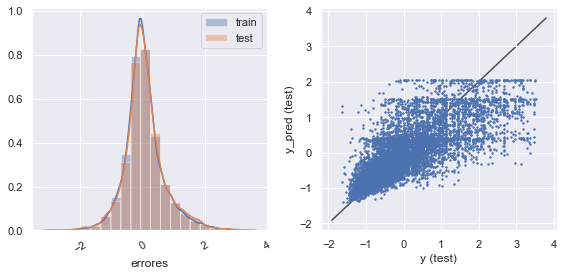

In [340]:
from sklearn.metrics import mean_squared_error
import seaborn as sns

y_train_pred = rgs.predict(X_train)
y_test_pred = rgs.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.xticks (rotation=30)
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.xticks (rotation=0)
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

*Como observamos en la gráfica y los resultados de RMSE, nuestro modelo no tiene un buen funcionamiento, si bien nuestros datos se encuentran mejor distribuídos en la linea media.*

In [341]:
# Utilizamos el GridSearch para encontrar nuestro mejor hiperparámetro

from sklearn.model_selection import GridSearchCV 
  
# Definimos el rango de parametros
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3) 
  
# Fitiamos el modelo para el grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.588, total=  13.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.6s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.567, total=  13.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   27.1s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.585, total=  13.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.562, total=  13.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.582, total=  14.9s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.554, total=  21.4s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.540, total=  30.3s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.555, total=  14.7s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.534, total=  14.7s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 15.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [342]:
# Imprimimos los mejores parámetros después de tunear nuestro modelo
print(grid.best_params_) 
  
# Imprimimos como queda nuestro modelo después del tuneo de hiperparámetros 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [343]:
#rgs_gs = SVR(C=100,gamma=0.01,kernel='rbf')

In [344]:
rgs_gs = SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [345]:
rgs_gs.fit(X_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [346]:
y_pred = rgs_gs.predict(X_test)

In [347]:
print('DATOS DEL MODELO VECTORES DE SOPORTE REGRESIÓN')
print('Precisión del modelo:')
print(rgs_gs.score(X_train, y_train))

DATOS DEL MODELO VECTORES DE SOPORTE REGRESIÓN
Precisión del modelo:
0.5880539953510178


Resultados con el R2 score

**Precisión del modelo sin GridSearch = 0.5888585751767023**

**Precisión del modelo con GridSearch = 0.5880539953510178**

Como vemos no hay muchos cambios entre ambos modelos luego de la mejora de los hiperparámetros

In [348]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse}')

Raíz del error cuadrático medio en Train: 0.6647483039080333


Raíz del error cuadrático medio en Train: 0.6370292042420151
Raíz del error cuadrático medio en Test: 0.6647483039080333


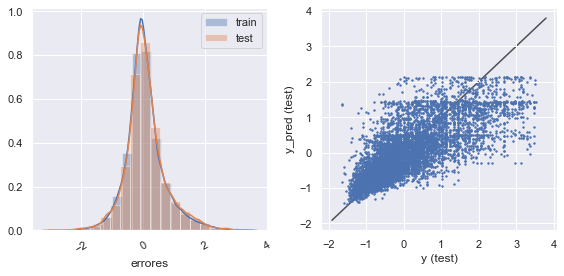

In [349]:
from sklearn.metrics import mean_squared_error
import seaborn as sns

y_train_pred = rgs_gs.predict(X_train)
y_test_pred = rgs_gs.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.xticks (rotation=30)
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.xticks (rotation=0)
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Resultado del RMSE

**Sin GridSearch**

Raíz del error cuadrático medio en Train: 0.6363876405111718

Raíz del error cuadrático medio en Test: 0.6638988271185702

**Con GridSearch**

Raíz del error cuadrático medio en Train: 0.6370457900720004

Raíz del error cuadrático medio en Test: 0.6648491444709456


***Como podemos ver no existen diferencias entre ambos modelos luego de la optimización de nuestros hiper parámetros***

## Parte C ##

**PARTE C - Interpretación de modelos : responder al menos una pregunta**

Debes estudiar qué variables utiliza el modelo para predecir y responder la pregunta: ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

Es muy importante que analices los errores del modelo. ¿Dónde es mayor el error? ¿dónde acierta?

Debes ser crítico/a con la metodología utilizada. ¿Qué mejorarías? Ten en cuenta siempre terminar con una discusión sobre lo realizado y conclusiones obtenidas.

### Conclusiones ###

A partir del trabajo realizado, realizaré un análisis de los tres puntos del proyecto con sus conclusiones. 
Creo que sin dudas la transformación de datos fue fundamental para comparar los resultados con el proyecto anterior. Si mi trabajo esta bien realizado, creo que la limpieza de los datos fue importante para mejorar la calidad del dataset. Así mismo, el escalado de datos es fundamental para que los modelos que aplique puedan funcionar correctamente. Al comparar mis resultados con el modelo anterior en la parte A vi que mejoró de manera notoria los resultados al comparar un modelo y otro. Con respecto a los modelos utilizados, al leer y estudiar cada uno de ellos, decidí seleccionar los que a mi criterio podía entender mejor en un modelo de regresión y ejecutarlos de igual manera. 

Si tengo que ser crítico de mi trabajo, todavía me cuesta mucho la programación, por eso trate de buscar modelos simples que me permitan una correcta aplicación. Para mí ha sido un logro importante ejecutar el notebook sin errores. Utilice como primer modelo el Adaboost que si bien me resultó simple de aplicar e interpretar probablemente no sea el mejor modelo para aplicar en un problema de regresión. Decidí continuar con el algoritmo de Random Forrest, para aplicar el bagging y no dejar ningún modelo sin ejecutar. Su interpretación me resulto dificil, si bien la teoría es simple razonarlo. Su aporte fundamental fue que me permitió descubrir cuáles eran las mejores variables a utilizar. A mi entender tanto en problemas de clasificación o regresión debería aplicarse como primer modelo por esta razón. Además tenía dos  atributos (features) como predictores fuertes y dos como débiles, lo que creo que hizo que los árboles fuese diferentes. Mis atributos fuertes era la variable "bathrooms" y "surface_total" que eran las variables con mayor correlación con el costo de la propiedad en el primer proyecto. Por último utilicé el SVM. 

Hemos aprendido o desarrollado nuestra carrera en base a modelos de clasificación y se me hace difícil saber si este modelo aplicado a un problema de regresión puede funcionar. Evidentemende de acuerdo a los resultados no fue de mucha utilidad. Como conclusión final entendí que el preprocesamiento de datos es la base de nuestro trabajo. De todo los trabajos que he leído, todos hacen hincapié en el tiempo que demanda este paso, como parte fundamental para iniciar nuestro trabajo. En cuanto a los modelos, en mi experiencia personal he tratado de cumplir con los objetivos a través de modelos complejos, pero me he dado cuenta que a partir de modelos simples podemos lograr resultados satisfactorios. 